# Practice Session 05: Network models

In this session we compare different network models to deterine the existence of the small-world effect. We say that a network is a small world if it has short paths and a high clustering coefficient. 

For lower clustering values, it's not clear to determine when the coefficiente is high, enough. Therefore, usually we compare it with a random network with an equivalent size and connectivity degree. 

**Identification information**

Authors: Jose Giner

Date: 8/3/2022

In [82]:
import math

import matplotlib.pyplot as plt
import networkx as nx

## 1 Random network (ER)

1. generate a random network with and appropriate p value
2. extract the giant component (see [Networkx documentation](https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_giant_component.html))
3. plot it
4. analize the small-world effect (path length and clustering)
5. plot the degree distribution

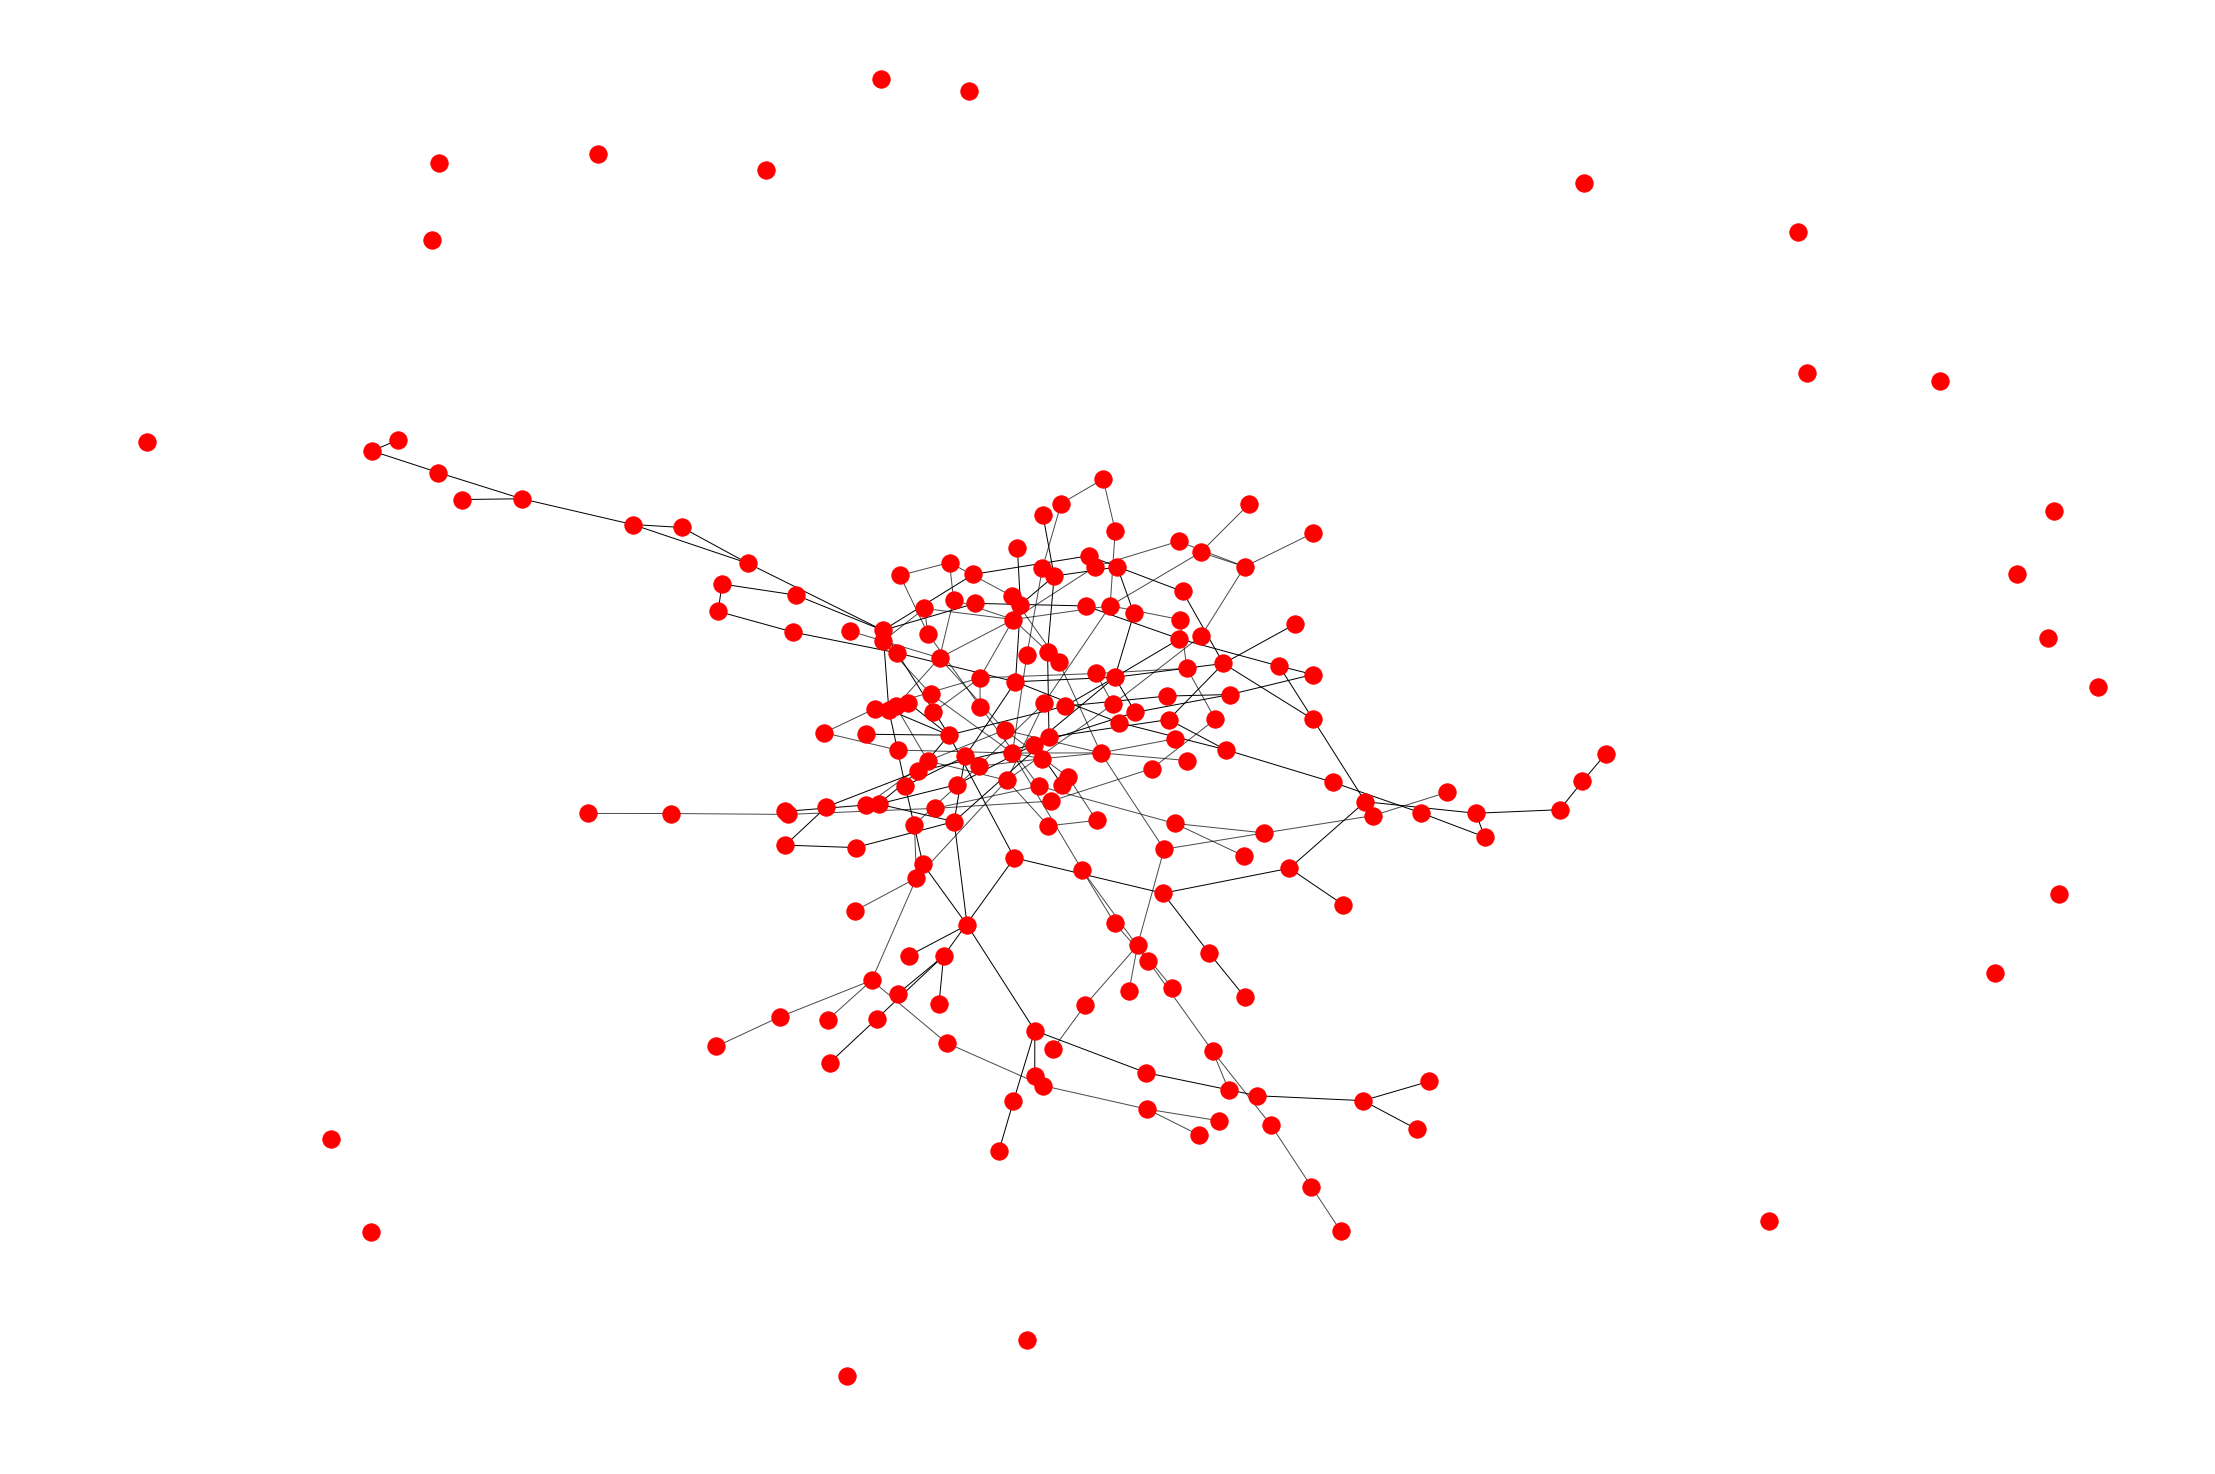

In [7]:
## your code here

G = nx.gnp_random_graph(100, 0.02)# 100 nodos y probabilidad 0.02
plt.axes([0.1,0.1,5,5])
pos = nx.spring_layout(G)#Position de los nodos usando el algoritmo de "force-directed" de Fruchterman-Reingold  
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.7) #alpha es la trasparencia de la arista. Maximo 1
    
nx.draw(G)

Extraemos la componente gigante

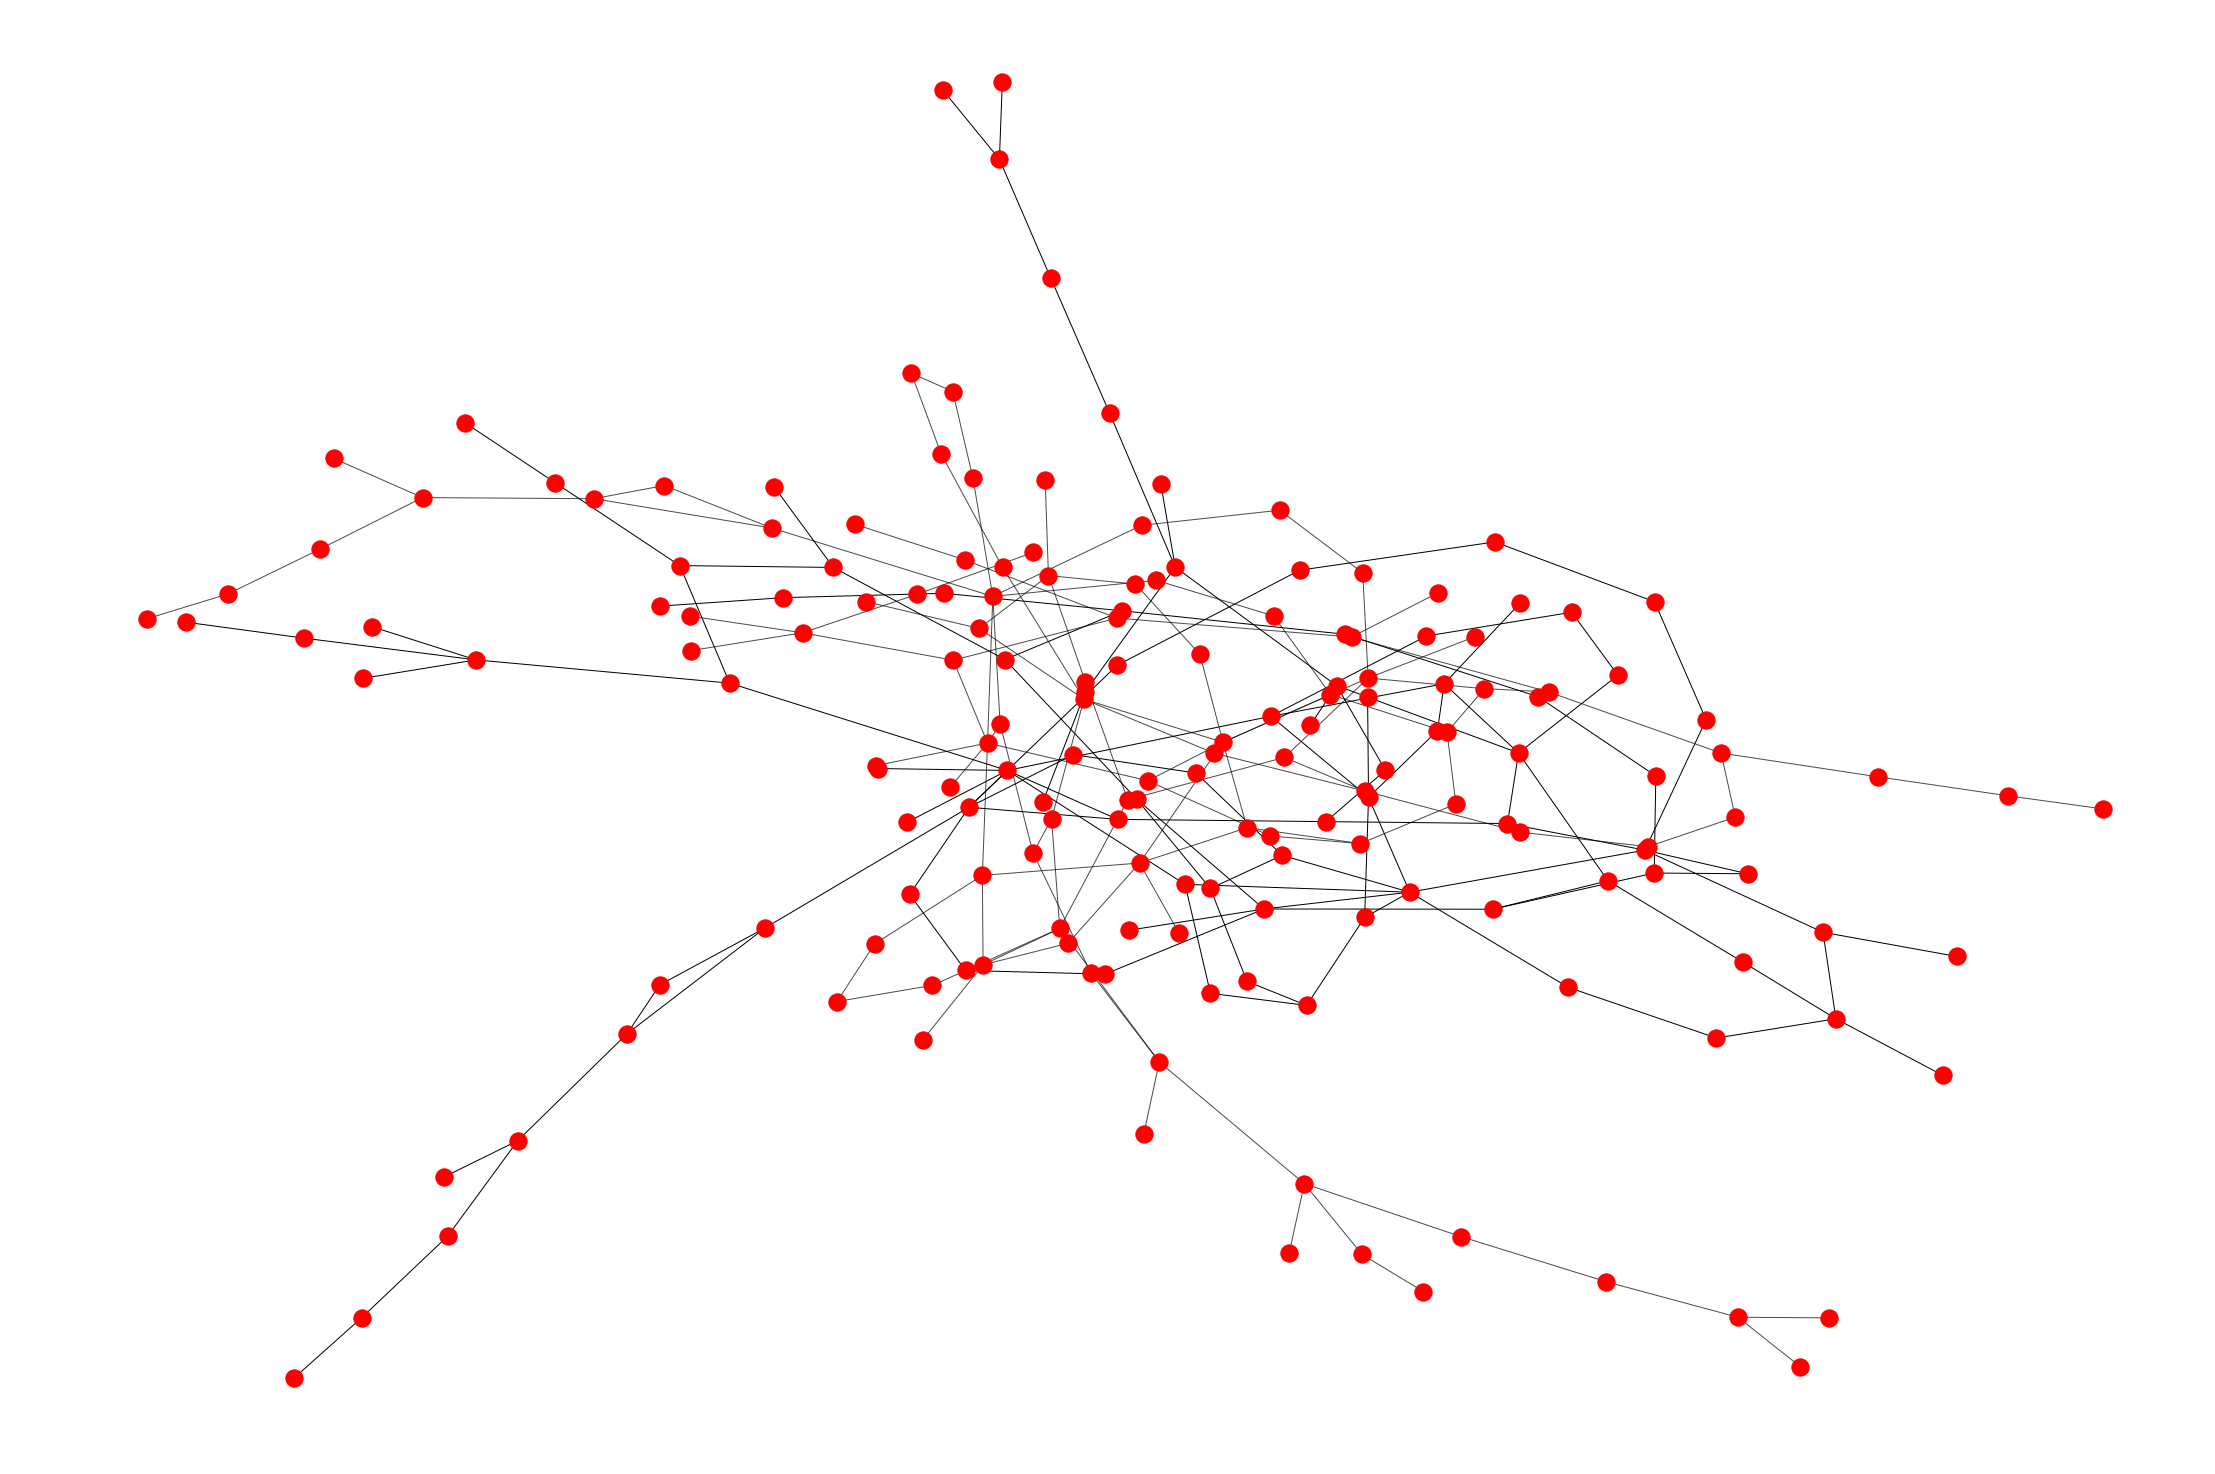

In [8]:
giant = max(nx.connected_component_subgraphs(G), key=len)
plt.axes([0.1,0.1,5,5])
pos = nx.spring_layout(giant)
nx.draw_networkx_nodes(giant, pos)
nx.draw_networkx_edges(giant, pos, alpha=0.7) 
    
nx.draw(giant)

Comprobamos el efecto del mundo pequeño calculando la distancia media y coeficiente de clustering de la componente gigante

In [9]:
media_caminos_mas_cortos=nx.average_shortest_path_length(giant)

print("La distancia media en la componente gigante es",round(media_caminos_mas_cortos,3))

La distancia media en la componente gigante es 5.759


In [10]:
c=nx.clustering(G)
c_medio = sum(v for v in c.values())/len(c)
print("El coeficiente de clustering por nodo es:\n",c,"\n")
print("El coeficiente de clustering medio es",round(c_medio,3))

El coeficiente de clustering por nodo es:
 {0: 0, 1: 0, 2: 0.3333333333333333, 3: 0.06666666666666667, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0.3333333333333333, 64: 0, 65: 0, 66: 0.047619047619047616, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0.3333333333333333, 72: 0, 73: 0, 74: 0, 75: 1.0, 76: 0, 77: 0, 78: 0.047619047619047616, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0.3333333333333333, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0.1, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0} 

El coeficiente de clustering medio es 0.026


Dibujamos la distribución de grados

In [11]:
import collections

sucesion_grados = sorted([d for n, d in G.degree()], reverse=False)  
n=len(G)

contamos_grados = collections.Counter(sucesion_grados) #cuenta cuantas veces aparece cada grado
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]  #Con esto cogemos la lista de frecuencias 
                                            #y la convertimos en prob dividiendo por n    
print("las probabilidades de los distintos grados son", probabilidad)

las probabilidades de los distintos grados son [0.11, 0.2, 0.34, 0.22, 0.06, 0.04, 0.01, 0.02]


Text(0.5,0,'Grados')

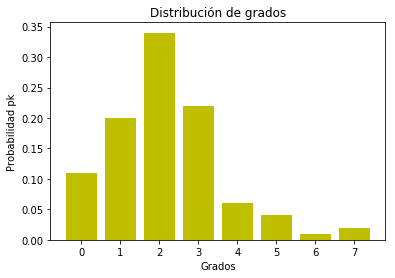

In [12]:
plt.bar(grados, probabilidad, width=0.80, color='y')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")

## 2 Watts-Strogatz network

### 2.1 General model

1. generate a Watts-Strogatz network with $p=0.3$
3. plot it (circular layout, see [Networkx documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html))
4. analize the small-world effect (path length and clustering)
5. plot the  degree distribution

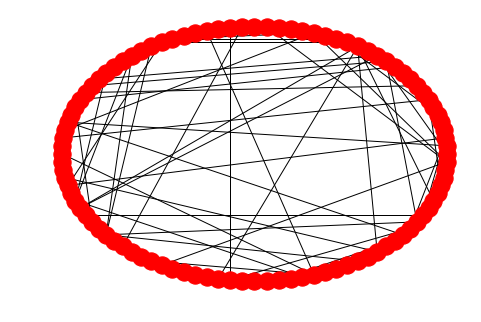

In [72]:
# your code here
G = nx.watts_strogatz_graph(n=100, k=5, p=0.3) #100 nodos, conectividad a 5 vecinos y probabilidad de redirigir el enlace a 0.3
circ = nx.circular_layout(G) #composición circular
nx.draw(G, pos = circ) 

Analizamos el efecto del mundo pequeño en esta red

In [73]:
media_caminos_mas_cortos=nx.average_shortest_path_length(G)

print("La distancia media es",round(media_caminos_mas_cortos,3))

La distancia media es 4.047


In [74]:
c=nx.clustering(G)
c_medio = sum(v for v in c.values())/len(c)
print("El coeficiente de clustering por nodo es:\n",c,"\n")
print("El coeficiente de clustering medio es",round(c_medio,5))

El coeficiente de clustering por nodo es:
 {0: 0.16666666666666666, 1: 0, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.3333333333333333, 5: 0.16666666666666666, 6: 0.3333333333333333, 7: 0.13333333333333333, 8: 0.26666666666666666, 9: 0.2, 10: 0.5, 11: 0.5, 12: 0.3, 13: 0.1, 14: 0.1, 15: 0, 16: 0.06666666666666667, 17: 0, 18: 0.1, 19: 0, 20: 0.1, 21: 0.3333333333333333, 22: 0.6666666666666666, 23: 0.3333333333333333, 24: 0.16666666666666666, 25: 0, 26: 0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.3333333333333333, 30: 0.3333333333333333, 31: 0.6666666666666666, 32: 0.3, 33: 0.16666666666666666, 34: 1.0, 35: 0, 36: 0.2, 37: 0, 38: 1.0, 39: 0.2, 40: 0.2, 41: 0.1, 42: 0.16666666666666666, 43: 0, 44: 0.1, 45: 0.6666666666666666, 46: 0.2, 47: 0.3333333333333333, 48: 0.16666666666666666, 49: 0.3333333333333333, 50: 0.3333333333333333, 51: 0.3333333333333333, 52: 0.3333333333333333, 53: 0.3333333333333333, 54: 0.1, 55: 0, 56: 0.06666666666666667, 57: 0.3333333333333333, 5

Dibujamos la distribución de grados

Text(0.5,0,'Grados')

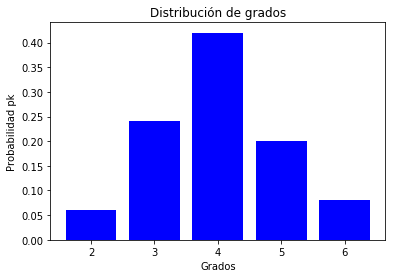

In [75]:
sucesion_grados = sorted([d for n, d in G.degree()], reverse=False)  
n=len(G)

contamos_grados = collections.Counter(sucesion_grados) 
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]     

plt.bar(grados, probabilidad, width=0.80, color='b')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")

### 2.2 Small-world parameters

Generate different network varying the redirection propability $p=0, p=0.3$ and $p=1$, as in the following figure
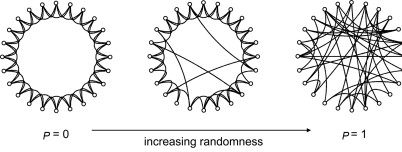

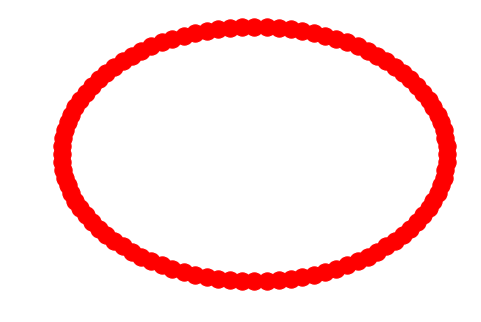

In [30]:
# your code here
G = nx.watts_strogatz_graph(n=100, k=2, p=0)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ)

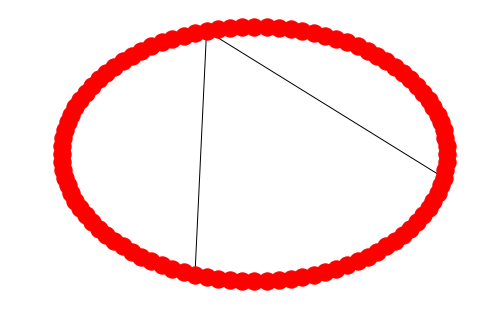

In [41]:
G = nx.watts_strogatz_graph(n=100, k=2, p=0.02)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ)

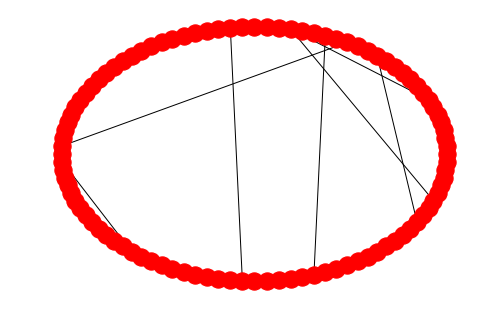

In [43]:
G = nx.watts_strogatz_graph(n=100, k=2, p=0.1)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ)

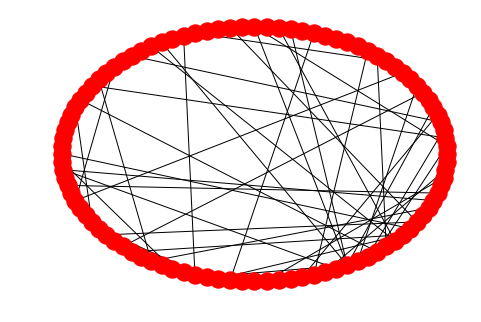

In [44]:
G = nx.watts_strogatz_graph(n=100, k=2, p=0.5)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ) 

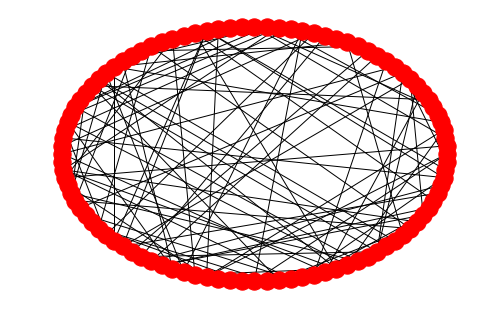

In [50]:
G = nx.watts_strogatz_graph(n=100, k=2, p=1.0)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ) 

### 2.3 Significance

Modify the code in point 1 to generate a random network equivalent to the Watts-Strogatz and compare them (average degree, network diameter, clustering, degree distribution)


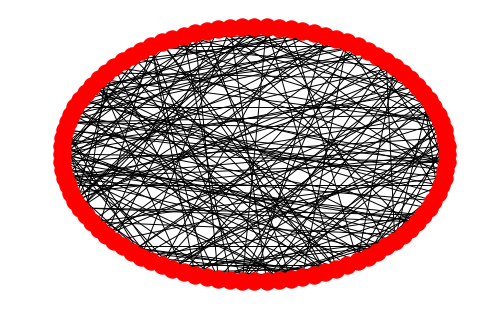

In [88]:
# your code here
G = nx.gnp_random_graph(100, 0.05)
circ = nx.circular_layout(G)
nx.draw(G, pos = circ) 

In [89]:
n=len(G)
s=sum([d for (n, d) in nx.degree(G)])
gradomedio=s/n

print("gradomedio={}".format(gradomedio))

gradomedio=4.68


In [90]:
diametro=nx.diameter(G)

print("El diametro es",diametro)

El diametro es 6


In [91]:
c=nx.clustering(G)
c_medio = sum(v for v in c.values())/len(c)
print("El coeficiente de clustering por nodo es:\n",c,"\n")
print("El coeficiente de clustering medio es",round(c_medio,3))

El coeficiente de clustering por nodo es:
 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0.047619047619047616, 5: 0.3333333333333333, 6: 0.3333333333333333, 7: 0.06666666666666667, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0.1, 13: 0.16666666666666666, 14: 0, 15: 0.2, 16: 0.07142857142857142, 17: 0.2, 18: 0.06666666666666667, 19: 0, 20: 0.06666666666666667, 21: 0, 22: 0, 23: 0, 24: 0.06666666666666667, 25: 0.13333333333333333, 26: 0, 27: 0.07142857142857142, 28: 0.06666666666666667, 29: 0.3333333333333333, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0.06666666666666667, 38: 0, 39: 0, 40: 0, 41: 0.06666666666666667, 42: 0, 43: 0.16666666666666666, 44: 0.047619047619047616, 45: 0, 46: 0.14285714285714285, 47: 0, 48: 0, 49: 0.05555555555555555, 50: 0.05555555555555555, 51: 0.14285714285714285, 52: 0, 53: 0.08333333333333333, 54: 0, 55: 0, 56: 0, 57: 0.09523809523809523, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0.03571428571428571, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0.13333

Text(0.5,0,'Grados')

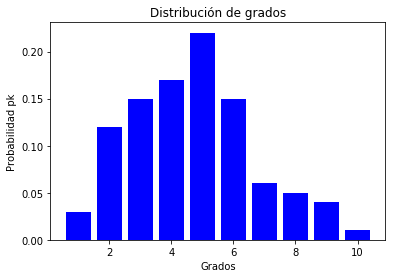

In [92]:
sucesion_grados = sorted([d for n, d in G.degree()], reverse=False)  
n=len(G)

contamos_grados = collections.Counter(sucesion_grados) 
grados, frecuencia = zip(*contamos_grados.items())

probabilidad=[i * (1/n) for i in frecuencia]     

plt.bar(grados, probabilidad, width=0.80, color='b')

plt.title("Distribución de grados")
plt.ylabel("Probabilidad pk")
plt.xlabel("Grados")

### 2.4 Small world

Generate networks with different redirection probabilities to check the variation of the clustering and path length (chek the slides). Generate several networks for the same $p$ and average the results. Plot them in the same graphics (x axis y log scale, left and right vertical axis for clustering and length)
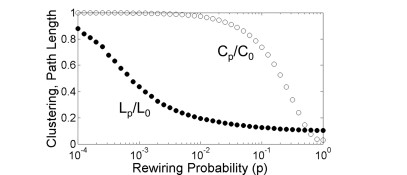
The results in this plot obt ained with n = 1000 and k = 10


In [94]:

# your code here
probs = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1]
final_c, final_p = {},{}
for p in probs:
    ccoef, plengths= [],[]
    for i in range(5):
        G = nx.watts_strogatz_graph(n=1000, k=10, p=p)
        c = nx.clustering(G)
        c_medio = sum(v for v in c.values())/len(c)
        ccoef.append(c_medio)
        path_length = nx.average_shortest_path_length(G)
        plengths.append(path_length)
    
    final_c[p] = sum(ccoef)/len(ccoef)
    final_p[p] = sum(plengths)/len(plengths)

In [95]:
G = nx.watts_strogatz_graph(n=1000, k=10, p=0)
c_0 = nx.clustering(G)
c_medio_0 = sum(v for v in c_0.values())/len(c_0)
p_0 = nx.average_shortest_path_length(G)

for k,v in final_c.items():
    final_c[k] = v/c_medio_0

for k,v in final_p.items():
    final_p[k] = v/p_0

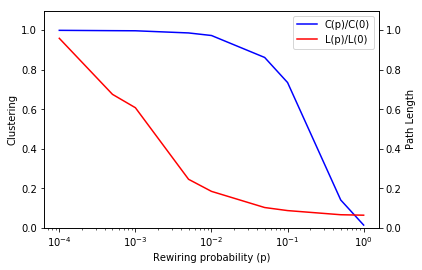

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
twin1 = ax.twinx()
ax.set_ylim(0,1.1)
twin1.set_ylim(0, 1.1)
p1, = ax.plot(probs, final_c.values(), "b-", label="C(p)/C(0)")
p2, = twin1.plot(probs, final_p.values(), "r-", label="L(p)/L(0)")
ax.set_xlabel("Rewiring probability (p)")
ax.set_ylabel("Clustering")
twin1.set_ylabel("Path Length")
ax.set_xscale('log')
ax.legend(handles=[p1, p2])
plt.show()

## 3 Preferential attachment network

Study the preferential attachment effect in an actual network. The dataset belong to the [Bitcoin OTC](https://www.bitcoin-otc.com/) web of trust: a bitcoin marketplace where users are rated according with their trust, in a scale from -10 (total distrust) to 10 (total trust). The dataset belongs to the [SNAP project](https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html).

1. load the data available in `soc-sign-bitcoinotc.csv` file (or download it from the web)
2. generate the network
3. plot it
4. analize the small-world effect (path length and clustering)
5. plot the degree distribution (linear and loglog)
6. estimate the parameter of the power-law (linear regression over log data)

In [83]:
# your code here
import pandas as pd
bitcoin_df = pd.read_csv('C:\\Users\\Jose Giner\\OneDrive\\Escritorio\\SNA\\session-5\\data\\soc-sign-bitcoinotc.csv', header = None)
df = bitcoin_df.set_axis(['Source', 'Target', 'Rating', 'Time'], axis=1, inplace=False)
df.head()

,Source,Target,Rating,Time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


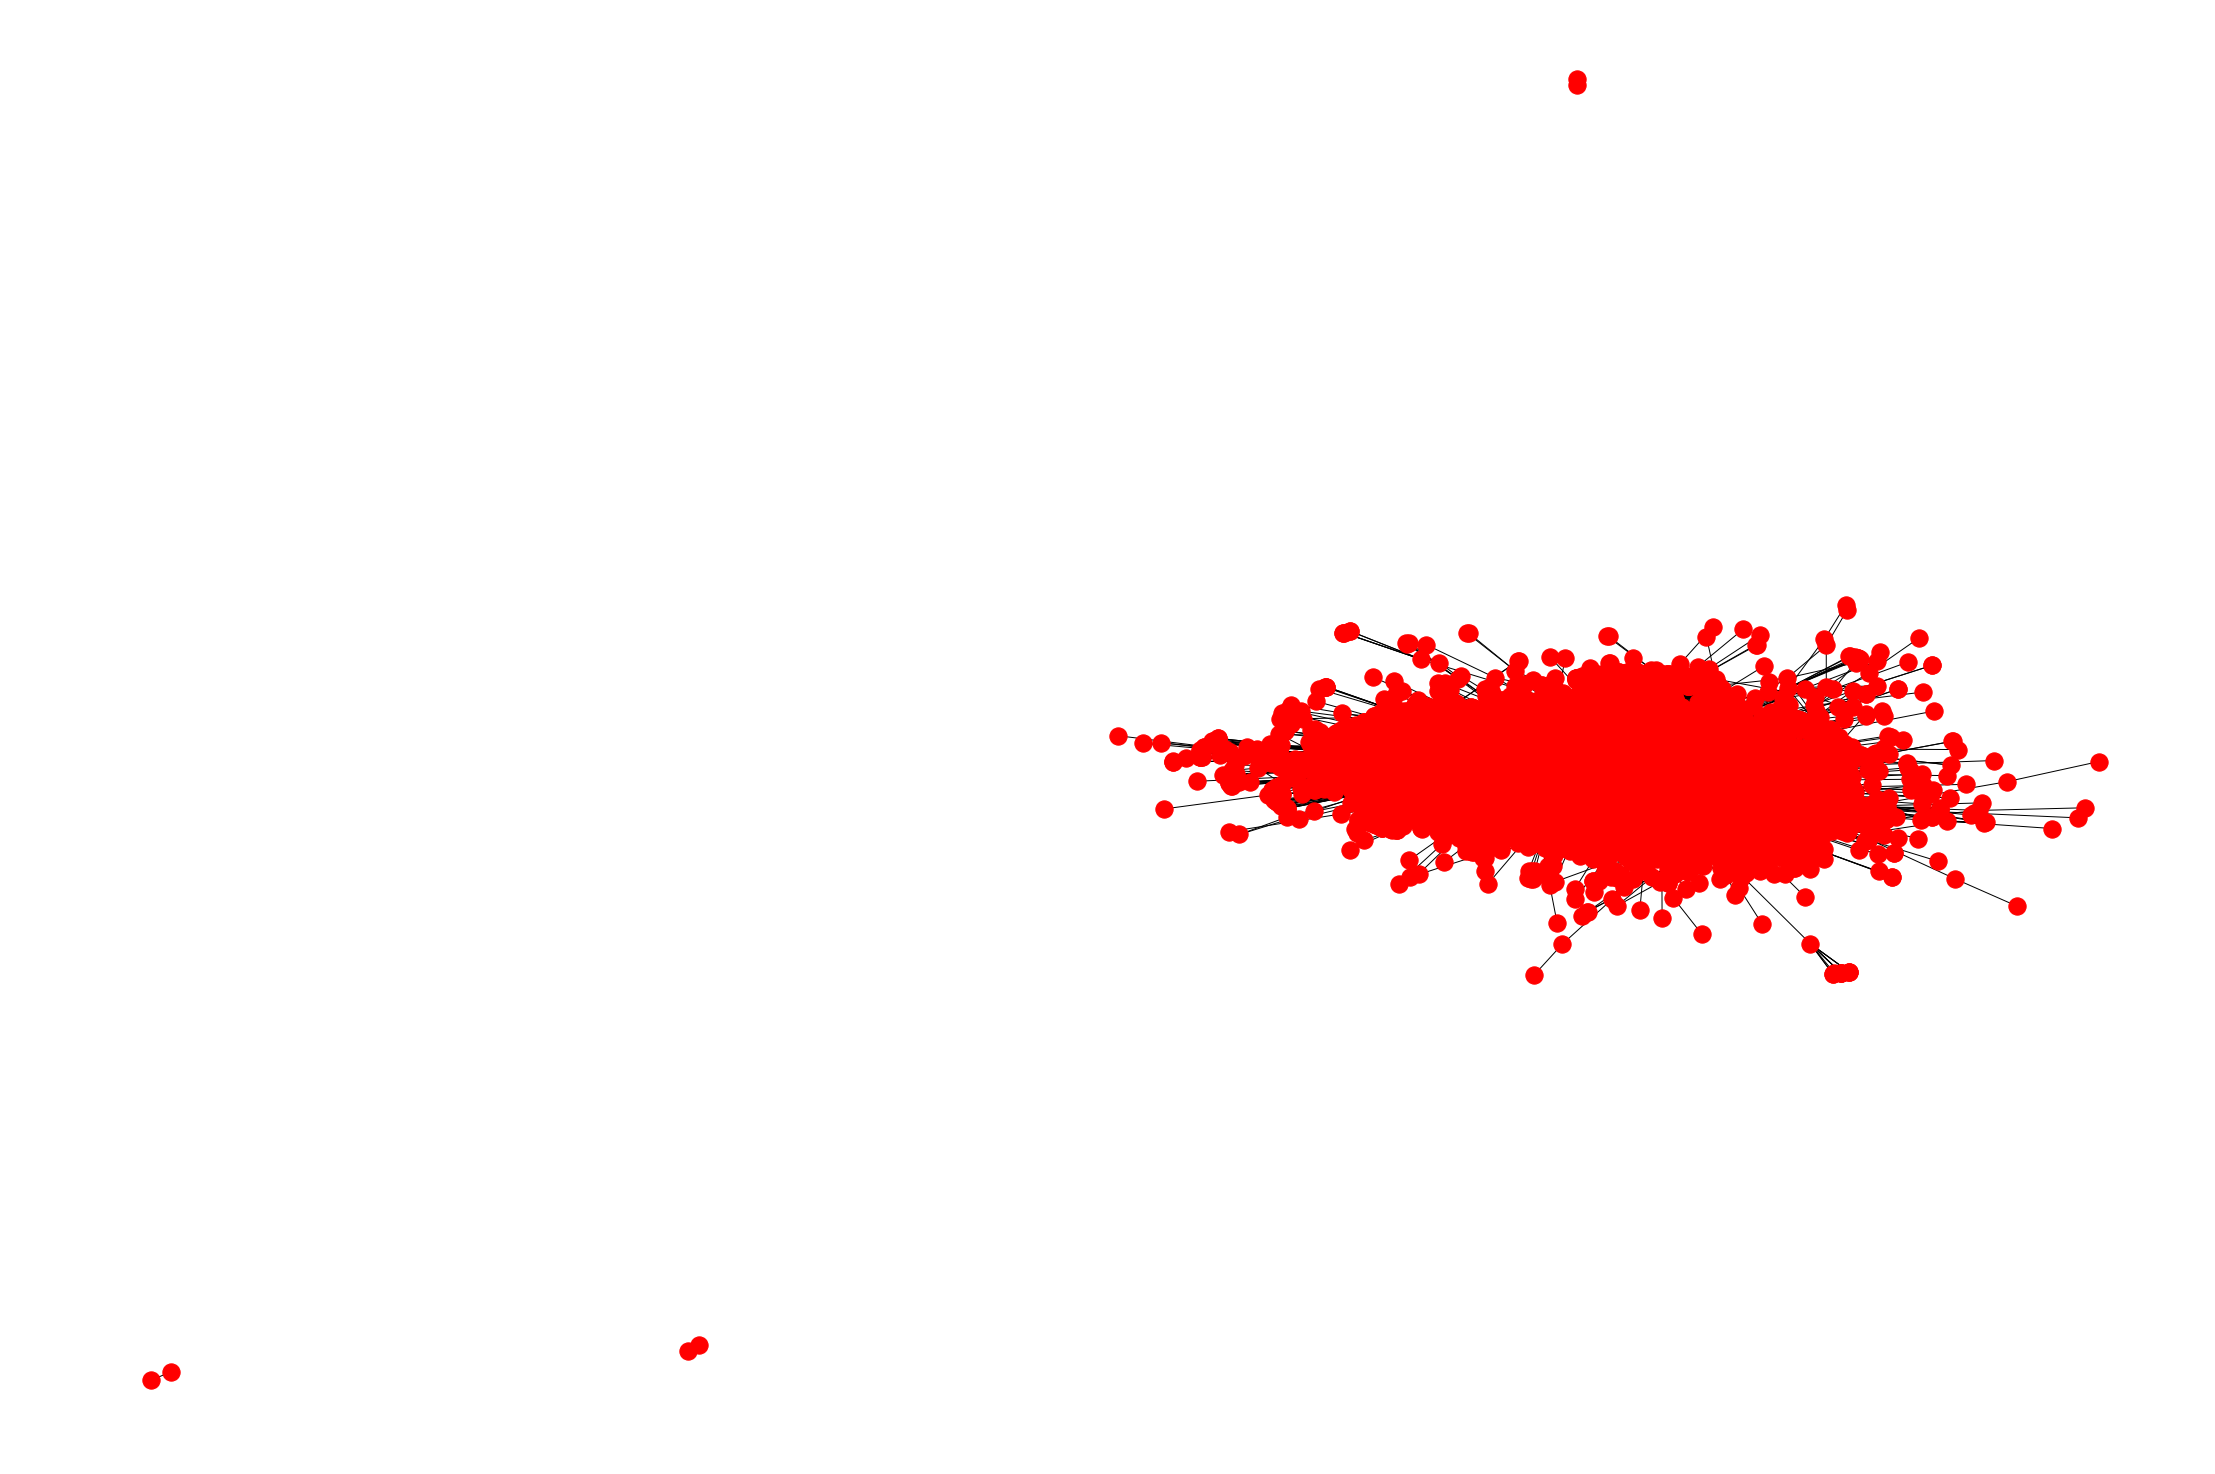

In [13]:
G=nx.from_pandas_edgelist(df, 'Source', 'Target')
plt.axes([0.1,0.1,5,5])
nx.draw(G)
plt.show()

Analizamos el efecto del mundo pequeño

In [15]:
giant = max(nx.connected_component_subgraphs(G), key=len) #extraemos la componente gigante
media_caminos_mas_cortos=nx.average_shortest_path_length(giant)

print("La distancia media es",round(media_caminos_mas_cortos,3))

La distancia media es 3.571


In [16]:
c=nx.clustering(G)
c_medio = sum(v for v in c.values())/len(c)
print("El coeficiente de clustering medio es",round(c_medio,3))

El coeficiente de clustering medio es 0.178


Dibujamos la distribución de grados en escala loglog

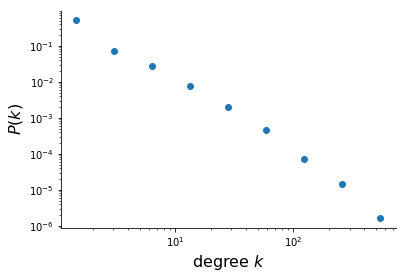

In [114]:
import numpy as np
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)


density, _ = np.histogram(degrees, bins=bin_edges, density=True)


fig = plt.figure(figsize=(6,4))


log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

Y ahora en escala lineal

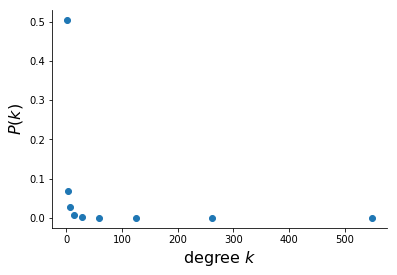

In [115]:
fig = plt.figure(figsize=(6,4))

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [127]:
from math import log
deg_exp = []
for k,p in zip(x,density):
    deg_exp.append(-log(p)/log(k))


In [130]:
print("La estimación del exponente de grado es {}".format(round(np.mean(deg_exp),3)))

La estimación del exponente de grado es 1.989


### 3.2 Identify the most relevant nodes

Calculate the main centrality measures (in and out degree, closeness, betweenness and pagerank) and create a table with the 10 nodes with highest values

In [84]:
# your code here
G=nx.from_pandas_edgelist(df, 'Source', 'Target',create_using=nx.DiGraph())


In [85]:
in_degrees = [(round(node), G.in_degree(node)) for node in G]
out_degrees = [(round(node), G.out_degree(node)) for node in G]

in_degrees = sorted(in_degrees, key = lambda x: x[1], reverse = True)[:10]
out_degrees = sorted(out_degrees, key = lambda x: x[1], reverse = True)[:10]

In [86]:
centr = nx.closeness_centrality(G)

In [87]:
closseness  = dict(sorted(centr.items(), key = lambda x: x[1], reverse = True))
closseness = list(closseness.items())[:10]
closseness = [(round(n),round(c,3)) for n,c in closseness]

In [88]:
betweenness = nx.betweenness_centrality(G)

In [89]:
betweenness = dict(sorted(betweenness.items(), key = lambda x: x[1], reverse = True))
betweenness = list(betweenness.items())[:10]
betweenness = [(round(n),round(b,3)) for n,b in betweenness]

In [90]:
pr = nx.pagerank(G)

In [91]:
pr = dict(sorted(pr.items(), key = lambda x: x[1], reverse = True))
pr = list(pr.items())[:10]
pr = [(round(n),round(p,3)) for n,p in pr]

In [93]:
df2 = pd.DataFrame(list(zip([n for n,d in in_degrees],[d for n,d in in_degrees], 
                            [n for n,d in out_degrees],[d for n,d in out_degrees],
                            [n for n,c in closseness], [c for n,c in closseness],  
                            [n for n,b in betweenness], [b for n,b in betweenness], 
                            [n for n,p in pr], [p for n,p in pr])),
               columns =['Node_id','In degree', 'Node_id','Out degree' , 'Node_id','Closeness centrality' , 
                         'Node_id','Betweenness centrality' , 'Node_id','Page Rank'])
df2

,Node_id,In degree,Node_id,Out degree,Node_id,Closeness centrality,Node_id,Betweenness centrality,Node_id,Page Rank
0,35,535,35,763,905,0.339,35,0.142,35,0.015
1,2642,412,2642,406,35,0.331,2642,0.062,2642,0.011
2,1810,311,1810,404,1,0.331,1810,0.050,1810,0.007
3,2028,279,2125,397,2642,0.327,905,0.048,2028,0.007
4,905,264,2028,293,13,0.321,1,0.045,7,0.006
5,1,226,905,264,2388,0.318,4172,0.042,905,0.005
6,4172,222,4172,264,1810,0.317,2125,0.042,1953,0.005
7,7,216,7,232,1334,0.317,7,0.040,1,0.005
8,4197,203,1,215,353,0.316,2028,0.039,4172,0.005
9,13,191,3129,212,4172,0.314,1953,0.032,4197,0.005
